# Simple Linear Regression

In [123]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [124]:
df = pd.read_csv('F:\Machine Learning\Task\WorldPopulation.csv')
df.head()

,Year,Population,ChangePerc,NetChange,Density,Urban,UrbanPerc
0,2020,7794798739,1.05,81330639,52,4378993944,56
1,2019,7713468100,1.08,82377060,52,4299438618,56
2,2018,7631091040,1.10,83232115,51,4219817318,55
3,2017,7547858925,1.12,83836876,51,4140188594,55
4,2016,7464022049,1.14,84224910,50,4060652683,54


In [125]:
df.tail()

,Year,Population,ChangePerc,NetChange,Density,Urban,UrbanPerc
65,1955,2773019936,1.77,48173195,19,877008842,32
66,1954,2724846741,1.76,47237781,18,850179106,31
67,1953,2677608960,1.78,46747398,18,824289989,31
68,1952,2630861562,1.81,46827301,18,799282533,30
69,1951,2584034261,1.88,47603112,17,775067697,30


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        70 non-null     int64  
 1   Population  70 non-null     int64  
 2   ChangePerc  70 non-null     float64
 3   NetChange   70 non-null     int64  
 4   Density     70 non-null     int64  
 5   Urban       70 non-null     int64  
 6   UrbanPerc   70 non-null     int64  
dtypes: float64(1), int64(6)
memory usage: 4.0 KB


In [127]:
df.describe()

,Year,Population,ChangePerc,NetChange,Density,Urban,UrbanPerc
count,70.000000,7.000000e+01,70.000000,7.000000e+01,70.000000,7.000000e+01,70.000000
mean,1985.500000,5.002010e+09,1.616429,7.511954e+07,33.557143,2.226815e+09,42.200000
std,20.351085,1.594877e+09,0.321288,1.256972e+07,10.723989,1.070191e+09,7.447595
min,1951.000000,2.584034e+09,1.050000,4.674740e+07,17.000000,7.750677e+08,30.000000
25%,1968.250000,3.570120e+09,1.262500,7.314225e+07,24.000000,1.294408e+09,36.000000
50%,1985.500000,4.915745e+09,1.770000,7.942852e+07,33.000000,2.035272e+09,41.500000
75%,2002.750000,6.361332e+09,1.847500,8.356683e+07,42.750000,3.054260e+09,48.000000
max,2020.000000,7.794799e+09,2.090000,9.290386e+07,52.000000,4.378994e+09,56.000000


In [128]:
df.isnull().sum()

Year          0
Population    0
ChangePerc    0
NetChange     0
Density       0
Urban         0
UrbanPerc     0
dtype: int64

### Single Independent Single Dependent 

In [129]:
df1 = df[['Year','ChangePerc']]
df1.head()

,Year,ChangePerc
0,2020,1.05
1,2019,1.08
2,2018,1.10
3,2017,1.12
4,2016,1.14


In [130]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        70 non-null     int64  
 1   ChangePerc  70 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.2 KB


In [131]:
df1.describe()

,Year,ChangePerc
count,70.000000,70.000000
mean,1985.500000,1.616429
std,20.351085,0.321288
min,1951.000000,1.050000
25%,1968.250000,1.262500
50%,1985.500000,1.770000
75%,2002.750000,1.847500
max,2020.000000,2.090000


In [132]:
df1.isnull().sum()

Year          0
ChangePerc    0
dtype: int64

In [133]:
x = df1.iloc[:,:-1]
y = df1.iloc[:,1]

In [134]:
x.head()

,Year
0,2020
1,2019
2,2018
3,2017
4,2016


In [135]:
print('X_shape:- ',x.shape)
print('Y_shape:- ',y.shape)

X_shape:-  (70, 1)
Y_shape:-  (70,)


### Train Test Split

In [136]:
from sklearn.model_selection import train_test_split

In [204]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 95)

In [205]:
print('X_train Shape -',x_train.shape)
print('X_test Shape -',x_test.shape)
print('Y_train Shape -',y_train.shape)
print('Y_test Shape -',y_test.shape)

X_train Shape - (56, 1)
X_test Shape - (14, 1)
Y_train Shape - (56,)
Y_test Shape - (14,)


### Linear Algo

In [206]:
from sklearn.linear_model import LinearRegression

In [207]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

### Prediction

In [208]:
y_pred = lr.predict(x_test)
y_pred

array([1.95031368, 1.72420078, 1.88380989, 1.32517801, 1.53799016,
       1.87050913, 1.28527574, 1.83060685, 1.64439623, 1.7508023 ,
       1.27197498, 1.35177953, 1.39168181, 1.43158409])

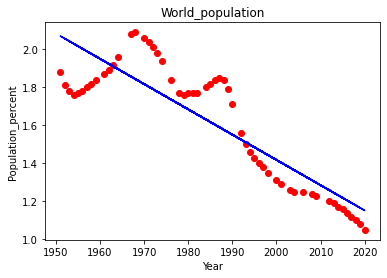

In [209]:
# for train data
plt.scatter(x_train,y_train,color = 'red')
plt.plot(x_train,lr.predict(x_train),color = 'blue')
plt.title('World_population')
plt.xlabel('Year')
plt.ylabel('Population_percent')
plt.show()

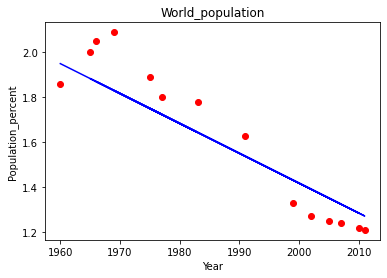

In [210]:
# For test data
plt.scatter(x_test,y_test,color = 'red')
plt.plot(x_test,y_pred,color = 'blue')
plt.title('World_population')
plt.xlabel('Year')
plt.ylabel('Population_percent')
plt.show()

In [211]:
from sklearn.metrics import r2_score

In [212]:
r2_score(y_test,y_pred)*100

85.59215195712846

In [216]:
lr.predict([[2019]]).round(2)

array([1.17])

In [218]:
df1.head()

,Year,ChangePerc
0,2020,1.05
1,2019,1.08
2,2018,1.10
3,2017,1.12
4,2016,1.14
